In [1]:
#pip install imbalanced-learn

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
# Load the dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(['Class', 'Time'], axis=1)
y = data['Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [5]:
# Scale the 'Amount' features
scaler = StandardScaler()
X[['Amount']] = scaler.fit_transform(X[['Amount']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [6]:
# verify result of smote
print(X_train_smote.shape)
X_train_smote.head()

(454902, 29)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239


In [7]:
# verify result of smote
print(y_train_smote.shape)
print(y_train_smote.value_counts())
y_train_smote.head()

(454902,)
0    227451
1    227451
Name: Class, dtype: int64


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
# make F1 score function
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score, average='binary')

In [9]:
# find optimal hyper of decision tree
ds = DecisionTreeClassifier()
grid = {'max_depth': np.arange(1,11)}
dtreeCV = GridSearchCV(ds, param_grid=grid, n_jobs=-1, scoring=f1)
dtreeCV.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring=make_scorer(f1_score, average=binary))

In [10]:
dtreeCV.best_params_

{'max_depth': 10}

In [11]:
# initialize classifers with optimal hyperparameter found in other notebooks
lr = LogisticRegression()
ds = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators = 100)
gbt = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.06, max_depth=3)

In [12]:
from sklearn.metrics import recall_score, average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

In [13]:
# init classifers with close-optimal hyperparameter
lr = LogisticRegression()
ds = DecisionTreeClassifier(max_depth=10)
rf = RandomForestClassifier(n_estimators = 100)
gbt = GradientBoostingClassifier(n_estimators = 100, learning_rate=0.06, max_depth=3)

In [14]:
lr.fit(X_train_smote, y_train_smote)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# look at prediction score of logistic regression
lr_prediction = lr.predict(X_test)

Recall = recall_score(y_test, lr_prediction, average = "binary")    
Precision = precision_score(y_test, lr_prediction, average = "binary")
F1score = f1_score(y_test, lr_prediction, average = "binary")  

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.109290
Best Recall Score 0.918367
Best Precision Score 0.058102


In [16]:
# look at prediction score of decision tree
ds.fit(X_train_smote, y_train_smote)

ds_prediction = ds.predict(X_test)

Recall = recall_score(y_test, ds_prediction, average = "binary")    
Precision = precision_score(y_test, ds_prediction, average = "binary")
F1score = f1_score(y_test, ds_prediction, average = "binary")    

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.155431
Best Recall Score 0.846939
Best Precision Score 0.085567


In [17]:
# look at prediciotn score of random forest
rf.fit(X_train_smote, y_train_smote)

rf_prediction = rf.predict(X_test)

Recall = recall_score(y_test, rf_prediction, average = "binary")    
Precision = precision_score(y_test, rf_prediction, average = "binary")
F1score = f1_score(y_test, rf_prediction, average = "binary")

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.878307
Best Recall Score 0.846939
Best Precision Score 0.912088


In [18]:
# look at prediction score of gradient boosting
gbt.fit(X_train_smote, y_train_smote)

gbt_prediction = gbt.predict(X_test)

Recall = recall_score(y_test, gbt_prediction, average = "binary")    
Precision = precision_score(y_test, gbt_prediction, average = "binary")
F1score = f1_score(y_test, gbt_prediction, average = "binary")  

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.165746
Best Recall Score 0.918367
Best Precision Score 0.091093


In [19]:
# init hard voting classifier with weights based on model prediction score
hard_voting = VotingClassifier(estimators=[('Logistic Regression', lr),
                                           ('Random Forest', rf),
                                           ('Gradient Boosting', gbt),
                                           ('Decision Tree', ds)], n_jobs=-1, voting='hard', weights=[1, 3, 1, 1])

In [20]:
hard_voting.fit(X_train_smote, y_train_smote)
hard_voting_prediction = hard_voting.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# look at hard voting classifier prediction score
Recall = recall_score(y_test, hard_voting_prediction, average = "binary")    
Precision = precision_score(y_test, hard_voting_prediction, average = "binary")
F1score = f1_score(y_test, hard_voting_prediction, average = "binary")

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.873684
Best Recall Score 0.846939
Best Precision Score 0.902174


In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, hard_voting_prediction)

0.9233902515705213

In [23]:
# init soft voting classifer with weights based on model prediction score
soft_voting = VotingClassifier(estimators=[('Logistic Regression', lr),
                                           ('Random Forest', rf),
                                           ('Gradient Boosting', gbt)], n_jobs=-1, voting='soft', weights=[1, 3, 1])

In [24]:
soft_voting.fit(X_train_smote, y_train_smote)
soft_voting = soft_voting.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# look at soft voting classifer prediction score
Recall = recall_score(y_test, soft_voting, average = "binary")    
Precision = precision_score(y_test, soft_voting, average = "binary")
F1score = f1_score(y_test, soft_voting, average = "binary")  

print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.815166
Best Recall Score 0.877551
Best Precision Score 0.761062


In [26]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, hard_voting_prediction)

<AxesSubplot: >

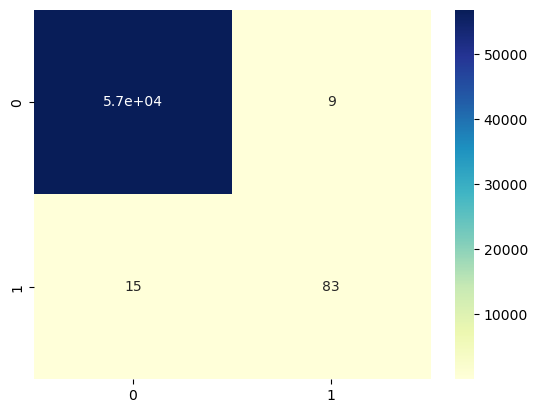

In [27]:
import seaborn as sns 
sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu')

In [28]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, average_precision_score
auprc = average_precision_score(y_true=y_test, y_score=hard_voting_prediction)

In [29]:
auprc

0.7643494026606633